In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy
import itertools

In [5]:
file = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\ACLED_1997-01-01-2023-07-18_Somalia.csv"
df = pd.read_csv(file)

In [6]:
v= df["event_date"]
v= v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df.sort_values("date_timestamp", inplace = True)

In [7]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

In [8]:
fa=df[df['fatalities']>0]
n_conf=df.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

In [10]:
aw=df[df['admin1']=='Awdal']

In [11]:
batt=df[df['event_type']=='Violence against civilians']
n_batt=batt.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()
len(batt)

7896

Text(0.5, 0, 'Event date')

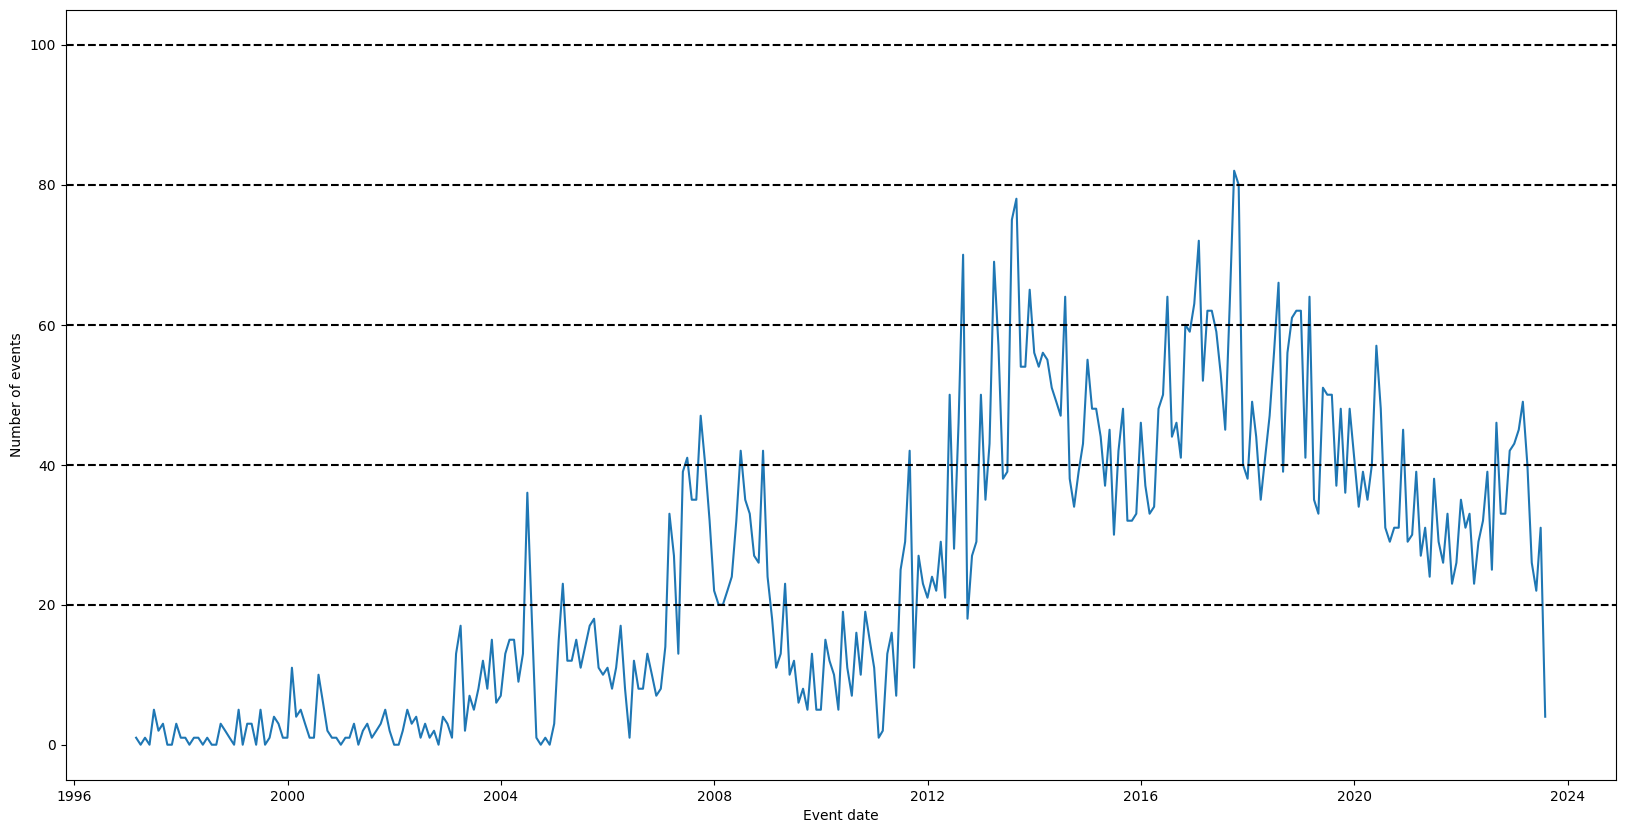

In [12]:
plt.figure(figsize=(20,10))
plt.plot(n_batt)
#plot horizontal line at y=80, 60, 40

plt.axhline(y=20, color='k', linestyle='--')
plt.axhline(y=40, color='k', linestyle='--')
plt.axhline(y=60, color='k', linestyle='--')
plt.axhline(y=80, color='k', linestyle='--')
plt.axhline(y=100, color='k', linestyle='--')
plt.ylabel("Number of events")
plt.xlabel("Event date")

In [14]:
fa.groupby(['admin1'])['event_id_cnty'].count()

admin1
Awdal                23
Bakool              508
Banadir            5604
Bari                581
Bay                1297
Galgaduud           685
Gedo                673
Hiraan             1142
Lower Juba         1313
Lower Shabelle     2652
Middle Juba         245
Middle Shabelle     913
Mudug               818
Nugaal              145
Sanaag              125
Sool                241
Togdheer            148
Woqooyi Galbeed      81
Name: event_id_cnty, dtype: int64

In [15]:
aw=df[df['admin1']=='Awdal']
aw[aw['fatalities']>0]

,event_id_cnty,year,date_timestamp,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
event_date,,,,,,,,,,,,,,,,,,,,,
1999-10-07,SOM127,1999,9.392472e+08,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,Borama,9.9387,43.1839,1,M2 Press Wire,International,Italian doctor killed by unnamed gunmen.,1,NaN,1567465437
2002-09-25,SOM381,2002,1.032905e+09,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),NaN,8,...,Jalelo,10.9833,42.9833,1,Undisclosed Source,Local partner-Other,ONLF attacks Ethiopian soldiers,5,NaN,1625524576
2008-10-25,SOM4584,2008,1.224886e+09,1,Political violence,Riots,Mob violence,Rioters (Somalia),NaN,5,...,Borama,9.9387,43.1839,1,Garowe Online,National,19-year-old girl was killed in Borama after So...,1,NaN,1572403718
2009-10-04,SOM5456,2009,1.254607e+09,1,Political violence,Battles,Armed clash,Military Forces of Ethiopia (1991-2018),NaN,8,...,Jalelo,10.9833,42.9833,1,All Africa,International,ONLF claim victory against Ethiopian military ...,6,NaN,1625524575
2012-12-30,SOM10480,2012,1.356822e+09,1,Demonstrations,Riots,Violent demonstration,Rioters (Somalia),NaN,5,...,Borama,9.9387,43.1839,1,Garowe Online,National,Somaliland election protests descend into riot...,1,NaN,1572403718
2012-12-31,SOM10487,2012,1.356908e+09,1,Demonstrations,Riots,Violent demonstration,Rioters (Somalia),NaN,5,...,Borama,9.9387,43.1839,1,Undisclosed Source,Local partner-Other,One person was killed and eight others injured...,1,NaN,1571260157
2013-01-09,SOM10560,2013,1.357686e+09,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Somalia),NaN,6,...,Saylac,11.3539,43.4731,1,Undisclosed Source,Local partner-Other,Hundreds of people staged a demonstration in S...,1,NaN,1571260157
2013-04-02,SOM11177,2013,1.364854e+09,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,Saylac,11.3539,43.4731,1,Undisclosed Source,Local partner-Other,The body a local youth organization leader was...,1,NaN,1571260153
2013-06-17,SOM11787,2013,1.371420e+09,1,Political violence,Violence against civilians,Attack,Dir-Gadabuursi Sub-Clan Militia (Somalia),NaN,4,...,Xariirad,10.3254,42.8374,1,Undisclosed Source,Local partner-Other,Unidentified armed men shot and killed a khat ...,1,NaN,1571260153


In [16]:
b=df[df['event_type']=='Battles']
c=df[df['event_type']=='Violence against civilians']
print('total: ', len(df))
print('battles: ', len(b))
print('violence against civilians: ', len(c))

b1=fa[fa['event_type']=='Battles']
c1=fa[fa['event_type']=='Violence against civilians']
print('total, >0 fatalities: ', len(fa))
print('battles + violence against civilians, >0 fatalities: ', len(b1)+len(c1))

total:  41397
battles:  20151
violence against civilians:  7896
total, >0 fatalities:  17194
battles + violence against civilians, >0 fatalities:  13604


In [17]:
reg = df.groupby(["region"])["fatalities"].sum().index.tolist()
viol = df.groupby(["event_type"])["fatalities"].sum().index.tolist()

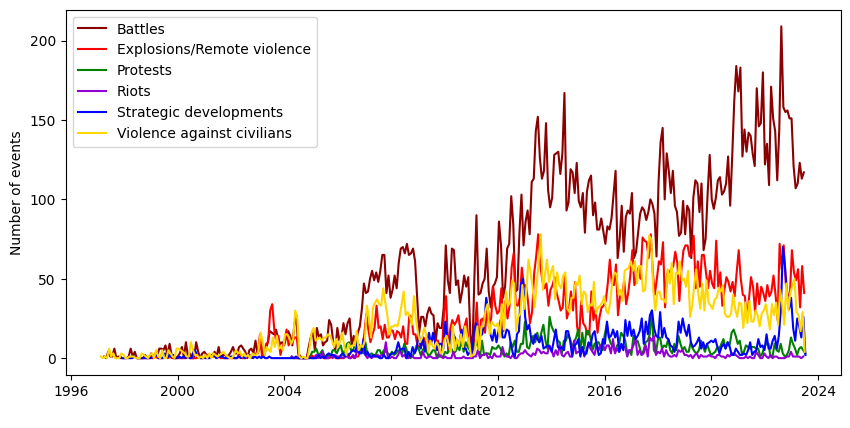

In [18]:
plt.figure(figsize=(10,5))
color_dict = {'Protests': 'green', 'Riots': 'darkviolet', 'Battles': 'darkred','Explosions/Remote violence': 'red', 'Strategic developments': 'blue',
'Violence against civilians': 'gold'}
for region in reg:
    re=df.loc[df["region"] == region]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:              
            plt.plot(g_pro, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()